<a href="https://colab.research.google.com/github/isDaisyorDaisy/proejcts/blob/main/Loan_Prediction_Problem%C2%B6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_original = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict_original = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

train = train_original.copy()
predict = train_original.copy()


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
predict.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


missing value


In [ ]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train= train.replace(' ', np.NaN)
train = train.fillna(train_original.mean())

<ipython-input-101-0e2163434188>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train_original.mean())


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
for col in train:
  if train[col].dtypes == 'object':
    train[col] = train[col].fillna(train[col].value_counts().index[0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
predict =predict.replace(" ", np.NaN)
predict = predict.fillna(predict.mean())

<ipython-input-106-1775d483a23e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  predict = predict.fillna(predict.mean())


In [ ]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
for col in predict:
  if predict[col].dtype == 'object': predict[col] = predict[col].fillna(predict[col].value_counts().index[0])

In [ ]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Exploratory Data Analysis

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

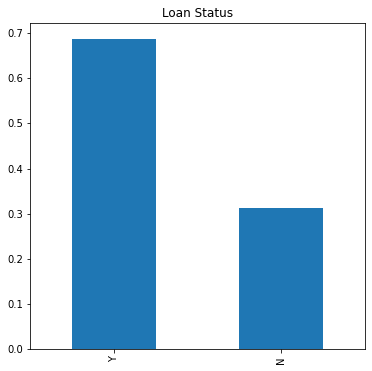

In [ ]:
train['Loan_Status'].value_counts(normalize = True).plot.bar(figsize = (6,6), title = 'Loan Status')

 70%(442) applicants got loan approval

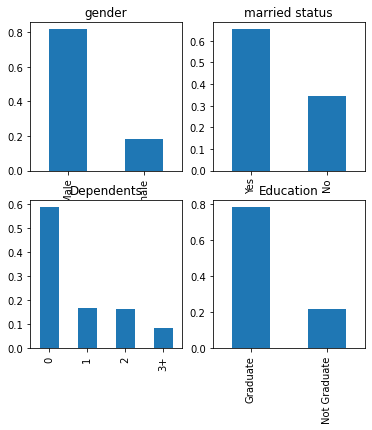

In [ ]:
plt.figure(1)
plt.subplot(221)#####number????
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (6,6), title = 'gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (6,6), title = 'married status')
plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize= (6,6), title = 'Dependents')
plt.subplot(224)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (6,6), title = 'Education')



- 80% applicants are male
- around 65% applicants are married
- around 60% applicants do not have dependents
- around 80% applicants are graduate


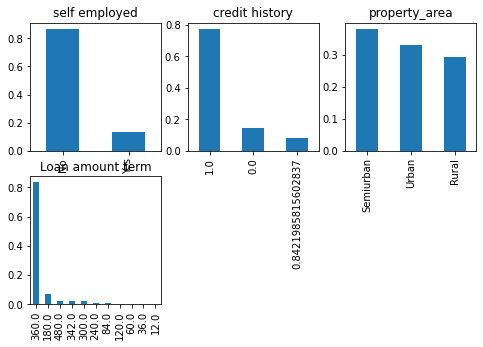

In [ ]:
plt.figure(2)
plt.subplot(331)#####number????
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (8,8), title = 'self employed')
plt.subplot(332)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (8,8), title = 'credit history')
plt.subplot(333)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize= (8,8), title = 'property_area')
plt.subplot(334)
train['Loan_Amount_Term'].value_counts(normalize = True).plot.bar(figsize = (8,8), title = 'Loan amount term')



- over 80% applicants are not self_employed
- around 78% applicants have 1 as credit ???
- around 40% applicants have the property in semiurban and around 33% are urban and 30% are in rural
-over 80% applicants choose 30year for their loan term


In [ ]:
#train['Credit_History'].value_counts()

In [ ]:
#train['Loan_Amount_Term'].value_counts()

In [ ]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


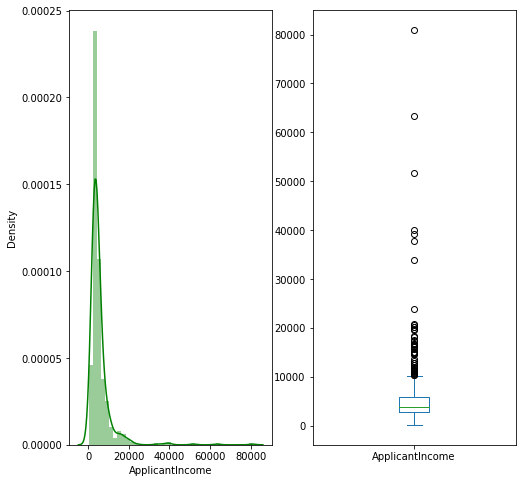

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train.ApplicantIncome, bins=40, hist=True, kde=True, rug=False, fit=None, color='g', vertical=False)
plt.subplot(122)
train.ApplicantIncome.plot.box(figsize = (8,8))

- most applicants income range are between 10000 and 20000, 80000 could be outlier

In [ ]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [ ]:
Married.div(Married.sum(1).astype(float), axis = 0)


Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.281796,0.718204


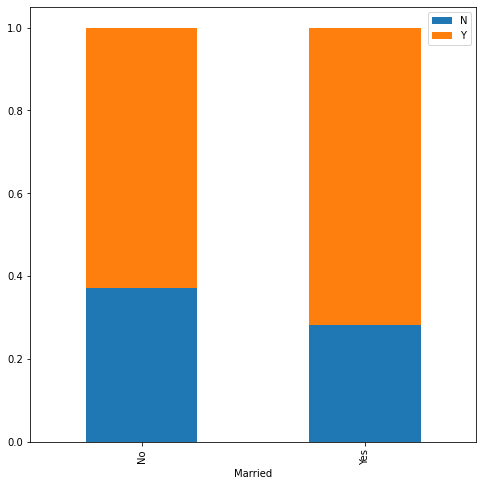

In [ ]:
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8,8))
plt.legend(loc = 'best')
### sum row =1
### x married y loan_status????????
###show the percentage ?????

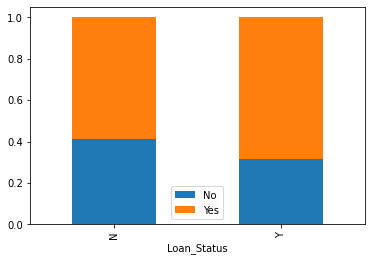

In [ ]:
Married1 = pd.crosstab( train['Loan_Status'], train['Married'])
Married1.div(Married1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

In [ ]:
Married1.div(Married1.sum(1).astype(float), axis = 0)

Married,No,Yes
Loan_Status,,
N,0.411458,0.588542
Y,0.317536,0.682464


- There are 63% not married applicants got the approval for loan and there are 72% married applicants got approval for loan
-married applicants have higher approval counts





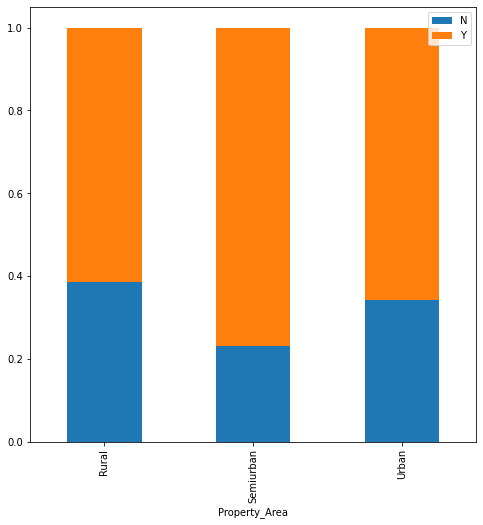

In [ ]:

Property_Area = pd.crosstab(train.Property_Area, train.Loan_Status)
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize= (8,8))
plt.legend(loc = 'best')


- applicants who have the property in semiurban have more approval

In [ ]:
train['total_income'] = train.ApplicantIncome + train.CoapplicantIncome
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


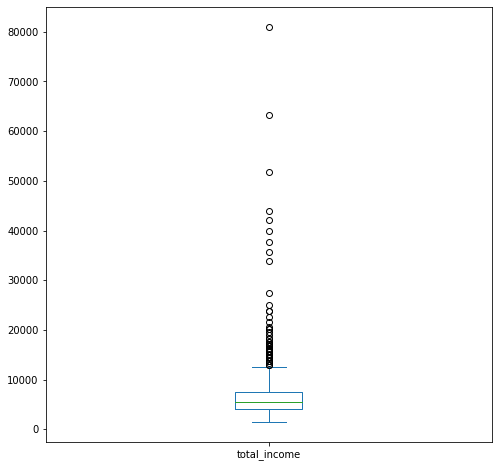

In [ ]:
train.total_income.plot.box(figsize = (8,8))

In [ ]:
train.total_income.describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: total_income, dtype: float64

- most applicants income range are between 10000 and 30000

In [ ]:
# train['total_income'] = train.ApplicantIncome + train.CoapplicantIncome
bins = [0, 2500,5000,7500, 81000]
group = ['low', 'average', 'high', 'very high']
# train['total_income_bin'] = pd.cut(train.total_income, bins, labels =group)
train['total_income_bin'] = pd.cut(train.total_income, bins, labels=group)
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,total_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,average
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,very high


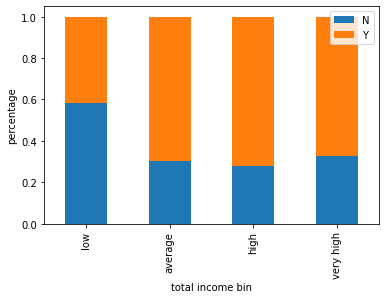

In [ ]:
total_income_bin = pd.crosstab(train.total_income_bin, train.Loan_Status)
total_income_bin.div(total_income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked =True)
plt.xlabel('total income bin')
plt.ylabel('percentage')
plt.legend(loc = 'best')

- total income above the average  is easier for approval